# Лабораторна робота No6
## ФБ-21 Тютюннікова Віолета
### Застосування numpy
### *Мета: отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.*
---
## Завдання 1
---

In [63]:
import numpy as np
import matplotlib.pyplot as plt
print("Все завантажено.")

Все завантажено.


#### 1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.

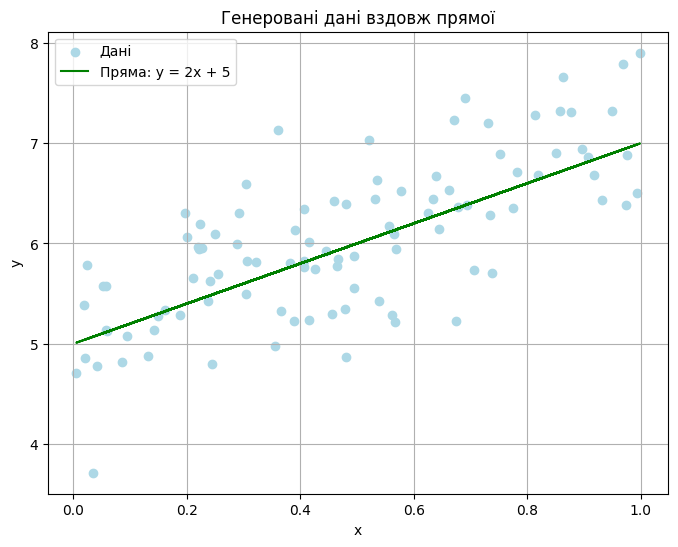

In [64]:
k = 2
b = 5
num = 100
x = np.random.rand(num)

mean = 0.1
std = 0.5
data = np.random.normal(mean, std, num)

y = k * x + b + data

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='lightblue', label='Дані')
plt.plot(x, k * x + b, color='green', label='Пряма: y = {}x + {}'.format(k, b))
plt.title('Генеровані дані вздовж прямої')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k(сер) та b(сер).

In [65]:
def squares(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k1 = (np.sum((x - x_mean) * (y - y_mean))) / (np.sum((x - x_mean) ** 2))  
    b1 = y_mean - k * x_mean
    return k1, b1

k_mnk, b_mnk = squares(x, y)
print("Значення k та b за МНК:")
print("k =", k_mnk)
print("b =", b_mnk)

Значення k та b за МНК:
k = 2.0611101812701564
b = 5.0783568618491515


#### 3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [66]:
# Початкові
print("Початкові значення k та b:")
print("k =", k)
print("b =", b)

#МНК
print("Значення за МНК k та b:")
print("k =", k_mnk)
print("b =", b_mnk)

#np.polyfit
polyfit = np.polyfit(x, y, 1)
k_pol = polyfit[0]
b_pol = polyfit[1]
print("Значення за np.polyfit:")
print("k =", k_pol)
print("b =", b_pol)

Початкові значення k та b:
k = 2
b = 5
Значення за МНК k та b:
k = 2.0611101812701564
b = 5.0783568618491515
Значення за np.polyfit:
k = 2.0611101812701613
b = 5.049468956342382


#### 4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

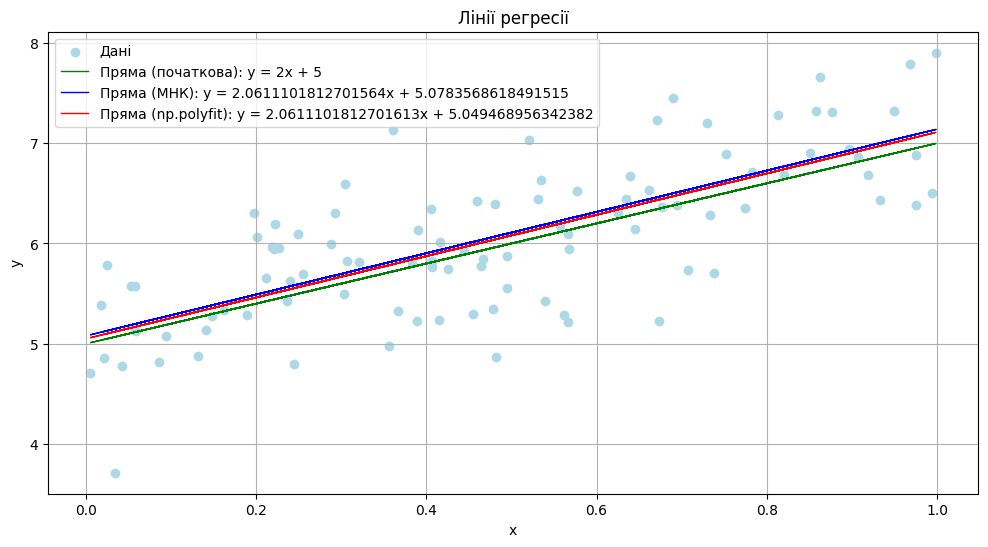

In [67]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='lightblue', label='Дані')

plt.plot(x, k * x + b, color='green', label='Пряма (початкова): y = {}x + {}'.format(k, b), linewidth=1)
plt.plot(x, k_mnk * x + b_mnk, color='blue',  label='Пряма (МНК): y = {}x + {}'.format(k_mnk, b_mnk), linewidth=1)
plt.plot(x, k_pol * x + b_pol, color='red',  label='Пряма (np.polyfit): y = {}x + {}'.format(k_pol, b_pol), linewidth=1)

plt.title('Лінії регресії')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


---
## Завдання 2
---

#### 1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k(сер) та b(сер). Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [68]:
def gradient(x, y, learning_rate=0.01, n_iter=1000):
    k2 = 1
    b2 = 1
    errors = []
    for i in range(n_iter):
        y_est = k2 * x + b2
        
        error = np.mean((y - y_est) ** 2) 
        errors.append(error)
        
        grad_k = (-2 / len(y)) * np.sum((y - y_est) * x)
        grad_b = (-2 / len(y)) * np.sum(y - y_est)
        
        k2 -= learning_rate * grad_k
        b2 -= learning_rate * grad_b    
    return k2, b2, errors

k_grad, b_grad, errors = gradient(x, y)
print("Значення k та b за методом градієнтного спуску:")
print("k =", k_grad)
print("b =", b_grad)

Значення k та b за методом градієнтного спуску:
k = 2.2837325592644238
b = 4.937179063082251


#### 2. Додайте отриману лінію регресії на загальний графік

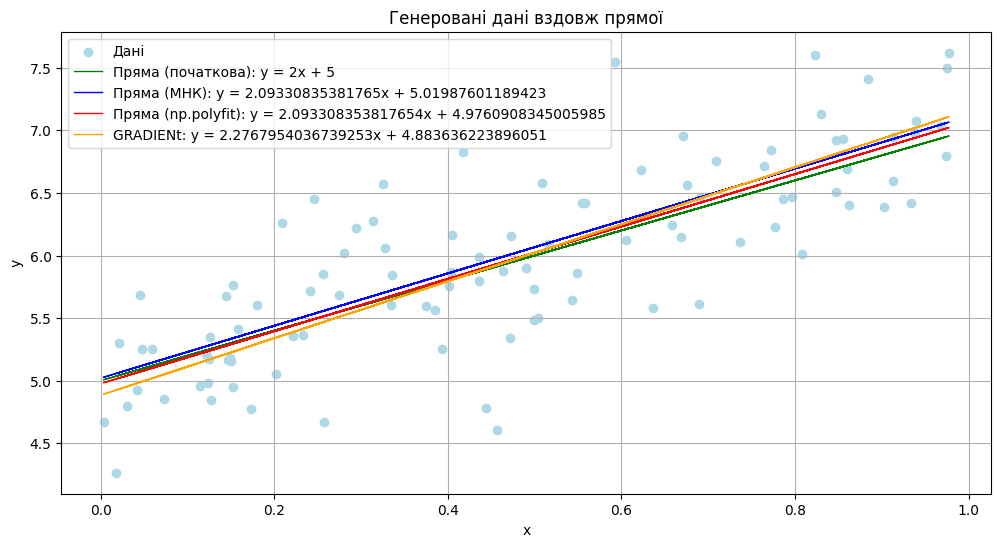

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='lightblue', label='Дані')

plt.plot(x, k * x + b, color='green', label='Пряма (початкова): y = {}x + {}'.format(k, b), linewidth=1)
plt.plot(x, k_mnk * x + b_mnk, color='blue',  label='Пряма (МНК): y = {}x + {}'.format(k_mnk, b_mnk), linewidth=1)
plt.plot(x, k_pol * x + b_pol, color='red',  label='Пряма (np.polyfit): y = {}x + {}'.format(k_pol, b_pol), linewidth=1)
plt.plot(x, k_grad * x + b_grad, color='orange',  label='GRADIENt: y = {}x + {}'.format(k_grad, b_grad), linewidth=1)

plt.title('Генеровані дані вздовж прямої')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### 3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

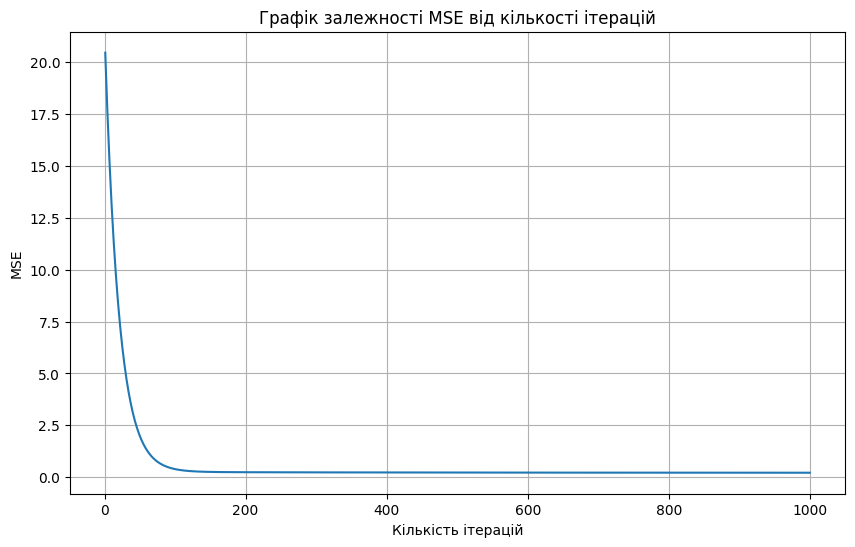

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, linestyle='-')

plt.title('Графік залежності похибки від кількості ітерацій')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.grid(True)
plt.show()

#### 4. Порівняйте отримані результати з результатами попереднього завдання

| Значення            | k | b |
|---------------------|---|---|
| Початкові           | 2 | 5 |
| МНК                 | 2.06111 | 5.0783 |
| polyfit             | 2.06111 | 5.0494 |
| Градієнтний спуск   | 2.2837 | 4.9371 |
